In [19]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt

#### Load dataset:

In [20]:
(x_train_raw, y_train), (x_test_raw, y_test) = keras.datasets.mnist.load_data()

#### Scale the dataset (from the range [0,255] to the range [0,1]):

(-0.5, 27.5, 27.5, -0.5)

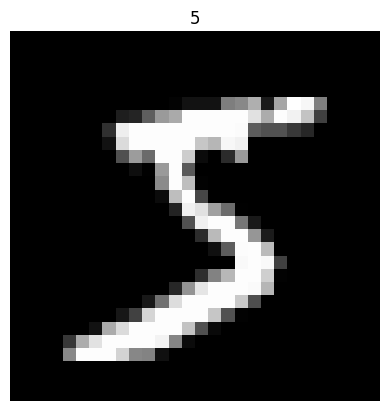

In [21]:
x_train_scaled = x_train_raw / 255
x_test_scaled = x_test_raw / 255

plt.imshow(x_train_scaled[0], cmap="gray")
plt.title(y_train[0])
plt.axis("off")

#### Reshape the dataset by adding a color channel (gray) for each image:

(-0.5, 27.5, 27.5, -0.5)

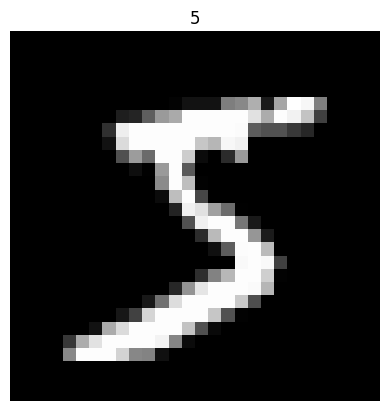

In [22]:
x_train = x_train_scaled.reshape(-1, 28, 28, 1)
x_test = x_test_scaled.reshape(-1, 28, 28, 1)

plt.imshow(x_train[0], cmap="gray")
plt.title(y_train[0])
plt.axis("off")

#### Create the CNN, one input layer, two hidden layers, one output layer:

In [25]:
cnn = models.Sequential(
    [
        # input layer
        layers.Conv2D(
            filters=25, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)
        ),
        layers.MaxPooling2D((2, 2)),
        # Two hidden layers
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        # output layer
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

#### Train the CNN with the data:

In [27]:
cnn.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
cnn.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2158 - accuracy: 0.9334
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0740 - accuracy: 0.9771
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0542 - accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0433 - accuracy: 0.9870
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0334 - accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0278 - accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0223 - accuracy: 0.9931
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0179 - accuracy: 0.9941
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0162 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.014

#### Test the CNN:

In [28]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0593 - accuracy: 0.9866


[0.05927145853638649, 0.9865999817848206]

#### Export the model

In [31]:
cnn.save(filepath="handwriting_cnn.h5", save_format="h5")